# Case Study on ANOVA

# XYZ Company has offices in four different zones. The company wishes to investigate the following


# The mean sales generated by each zone

#Read the data set

In [53]:
import pandas as pd

In [54]:
df=pd.read_csv("C:\DSA\Sales_data_zone_wise (1).csv")

In [55]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [57]:
#The mean sale generated by each Zone

In [58]:
df.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

In [59]:
#The mean sale generated by each Zone can also be done by

In [60]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


# Total sales generated by all the zones for each month.

In [61]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [62]:
#Total sales generated by all the Zone for each month

In [63]:
df["sum"] = df. sum(axis=1)
print(df)

         Month  Zone - A  Zone - B  Zone - C  Zone - D      sum
0    Month - 1   1483525   1748451   1523308   2267260  7022544
1    Month - 2   1238428   1707421   2212113   1994341  7152303
2    Month - 3   1860771   2091194   1282374   1241600  6475939
3    Month - 4   1871571   1759617   2290580   2252681  8174449
4    Month - 5   1244922   1606010   1818334   1326062  5995328
5    Month - 6   1534390   1573128   1751825   2292044  7151387
6    Month - 7   1820196   1992031   1786826   1688055  7287108
7    Month - 8   1625696   1665534   2161754   2363315  7816299
8    Month - 9   1652644   1873402   1755290   1422059  6703395
9   Month - 10   1852450   1913059   1754314   1608387  7128210
10  Month - 11   2004480   1740365   1317869   1970069  7032783
11  Month - 12   1537539   1875658   1237722   1460165  6111084
12  Month - 13   1254939   1588473   1348629   1733383  5925424
13  Month - 14   1821799   1844081   1617376   1872259  7155515
14  Month - 15   1128185   1804613   176

# Check whether all the zones generate the same amount of sales.


In [ ]:
#ANOVA STATISTICS BY STATSMODEL

In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
df_melt=pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])

In [67]:
df_melt.columns = ['index', 'treatments', 'value']

In [68]:
df_melt

,index,treatments,value
0,0,Zone - A,1483525
1,1,Zone - A,1238428
2,2,Zone - A,1860771
3,3,Zone - A,1871571
4,4,Zone - A,1244922
...,...,...,...
111,24,Zone - D,1695122
112,25,Zone - D,1520406
113,26,Zone - D,1289160
114,27,Zone - D,2178267


In [ ]:
#BOX PLOT REPRESENTATION OF ZONE A, ZONE B, ZONE C, ZONE D

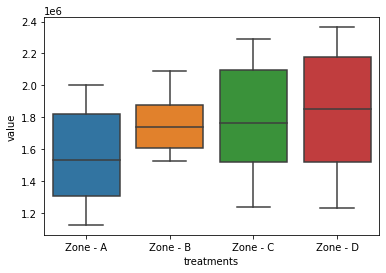

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt)

plt.show()

In [71]:
model = ols('value ~ C(treatments)', data=df_melt).fit()

In [72]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


In [ ]:
#ANOVA STATISTICS BY SCIPY.STATS

In [78]:
import scipy.stats as stats

In [79]:
fvalue, pvalue = stats.f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'], df['Zone - D'])

In [80]:
print(fvalue, pvalue)

5.672056106843581 0.0011827601694503335


In [82]:
import scipy.stats

In [85]:
F_Criti_Value=scipy.stats.f.ppf(q=1-.05, dfn=3, dfd=112)

In [86]:
F_Criti_Value

2.6856434512366034

In [ ]:
#Conclusion based on p value

In [84]:
if pvalue<0.05:
    print(' Reject H0: there is a difference in means of Zone A,B,C,D')
else:
    print('Reject Ha: There is no difference in means of Zone A,B,C,D')


 Reject H0: there is a difference in means of Zone A,B,C,D


In [ ]:
#Conclusion based on F CRITICAL VALUE

In [87]:
if fvalue>F_Criti_Value:
    print(' Reject H0: there is a difference in means of Zone A,B,C,D')
else:
    print('Reject Ha: There is no difference in means of Zone A,B,C,D')

 Reject H0: there is a difference in means of Zone A,B,C,D


In [ ]:
# Based on ANova test, it is possible to conclude that Zones generates different amount of sales.

# TURKEYS HSD TEST-Multiples Comparisons of Means

In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [93]:
turkey = pairwise_tukeyhsd(endog=df_melt['value'],
                          groups=df_melt['treatments'],
                          alpha=0.05)

In [94]:
print(turkey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1   group2    meandiff  p-adj     lower        upper    reject
--------------------------------------------------------------------
Zone - A Zone - B 215066.4483 0.0324   12856.2973 417276.5992   True
Zone - A Zone - C 232377.8966 0.0174   30167.7456 434588.0475   True
Zone - A Zone - D 302433.6207  0.001  100223.4697 504643.7717   True
Zone - B Zone - C  17311.4483    0.9 -184898.7027 219521.5992  False
Zone - B Zone - D  87367.1724  0.654 -114842.9786 289577.3234  False
Zone - C Zone - D  70055.7241 0.7787 -132154.4268 272265.8751  False
--------------------------------------------------------------------


IF P value is less than 0.05, there is a difference between two mean.So it is conclude that there is a statistically significant difference between amount of sales generated by Zone- A and Zone-B, Zone-A and Zone-C, Zone A and Zone D. There is no statistically significant difference between the amount of sales generated by Zone B and Zone C,Zone B and Zone D and Zone C and Zone D

